## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv('ab_data.csv');
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [4]:
len(df)

294478

c. The number of unique users in the dataset.

In [5]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [6]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [7]:
#3 possible ways [new_page + control, old_page + treatment, old_page + control]
new_cont = df.query("landing_page == 'new_page' and group == 'control'")
old_trt = df.query("landing_page == 'old_page' and group == 'treatment'")
len(new_cont)+len(old_trt)

3893

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum().sum()

0

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df.drop(df.query("landing_page == 'new_page' and group == 'control'").index, inplace=True)
df.drop(df.query("landing_page == 'old_page' and group == 'treatment'").index, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
df.to_csv('ab_clean.csv', index=False)
df2 = pd.read_csv('ab_clean.csv')

In [11]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [12]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [13]:
df2['user_id'].duplicated().sum()

1

c. What is the row information for the repeat **user_id**? 

In [14]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1876    773192
2862    773192
Name: user_id, dtype: int64

In [15]:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
print(df2.loc[2862]);

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 2862, dtype: object


In [65]:
df2.drop(df2.index[2862], inplace = True);

In [17]:
#Check there are no duplicates
df2['user_id'].duplicated().sum()

1

In [18]:
#Check the number of unique user_id is unchanged at 290584
df2['user_id'].nunique()

290584

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2['converted'].mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2_cont = df2.query('group == "control"');
df2_cont['converted'].mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
df2_trt = df2.query('group == "treatment"');
df2_trt['converted'].mean()

0.11880724790277405

d. What is the probability that an individual received the new page?

In [22]:
newp = len(df2.query('landing_page == "new_page"'))
total = len(df2)
newp_pr = newp / total
newp_pr

0.5000636646764286

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

The control group, which viewed the old page, had a marginally higher conversion rate of 12.04% compared to the treatment group, which viewed the new page and had a conversion rate of 11.88%. As this difference is at the margin, I would not consider this conclusive evidence for one page leading to more conversions.

Further, as indicated from the last question, the probability of an individual receving the new page is 50%. The equal likelihood of receiving either page suggests there is no evidence of a bias in the form of either page appearing more frequently.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H_{0}$ : $p_{new}$ - $p_{old}$ <=  0
<br>
$H_{1}$ : $p_{new}$ - $p_{old}$ >  0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [23]:
p_new = df2['converted'].mean();
p_new

0.11959667567149027

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [24]:
p_old = df2['converted'].mean();
p_old

0.11959667567149027

c. What is $n_{new}$?

In [25]:
n_new = len(df2.query("group == 'treatment'"));
n_new

145311

d. What is $n_{old}$?

In [26]:
n_old = len(df2.query("group == 'control'"));
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [27]:
new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, 1-p_new]);

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [28]:
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, 1-p_old]);

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [29]:
new_page_converted.mean() - old_page_converted.mean()

-0.0010489868869889424

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [30]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new, 1-p_new]).mean()
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old, 1-p_old]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

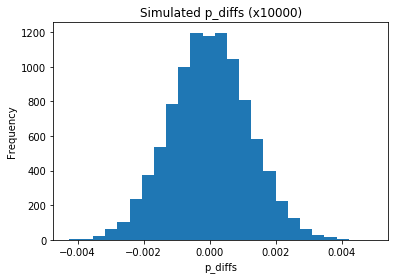

In [31]:
plt.hist(p_diffs, bins = 25)
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('Simulated p_diffs (x10000)');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [42]:
# compute difference from original dataset ab_data.csv
act_diff = df[df['landing_page'] == 'new_page']['converted'].mean() -  df[df['landing_page'] == 'old_page']['converted'].mean()
(act_diff < p_diffs).mean()

0.90739999999999998

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We calculated that 91% of the of the simulated sample presented a greater difference betweeen the conversion rates of the old page and new page in comparison to the actual difference. The calculated p-value suggests that the new page does not have a higher conversion rate than the old page. The p-value is the probability of observing our statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

The p-value of 0.91 is larger than the critical value of 0.05 and falls outside the rejection region, as such we fail to reject the null hypothesis and cannot conclude that there is a difference between the new and old pages.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [45]:
import statsmodels.api as sm

convert_old = sum(df2.query("landing_page == 'old_page'")['converted'])
convert_new = sum(df2.query("landing_page == 'new_page'")['converted'])
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'"))
print(convert_old, convert_new, n_old, n_new);

17489 17264 145274 145311


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [50]:
#Reference: http://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html
z_score, p_val = z_score, p_value = sm.stats.proportions_ztest(count=[convert_old, convert_new], nobs=[n_old, n_new], alternative='smaller')
print(z_score, p_val)

1.31160753391 0.905173705141


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [49]:
#Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy.stats import norm
#Compare z-score to one-tailed test critical value at 5% significance level
print(norm.ppf(1-(0.05)))

1.64485362695


The standard z-score indicates where a specific value is in terms of standard deviation units from the mean within a normal distribution. It enables the calculation of the probability for a score to occur. Z-scores can be calculated to subsequently interpret p-values.

The p-value is 90.5% and highlights the probability that this result is due to random chance. The z-score (1.311) falls below the critical value (1.644) at the 5% significance level of this one-tailed test. This does not fall in the rejection region of the null, as such we fail to reject the null hypothesis that the new page has a higher conversion rate than the old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The logistic regression should be performed as we are looking at binary outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [111]:
#We have to make new ab_page column for the logit
#create empty column
df2['ab_page'] = pd.Series(np.zeros(len(df2)), index=df2.index);
#Store treatment group index
trt_ind = df2[df2['group']=='treatment'].index;
#Set ab_page as a function of treatment group index with a value of 1
df2.set_value(index=trt_ind, col='ab_page', value=1);
#change data type to integer
df2['ab_page'] = df2['ab_page'].astype(int);
#check to make sure ab_page has been added correctly
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


In [108]:
import statsmodels.api as sm
#Set intercept column for logit
df2['intercept']=1;
#run and fit logit regression
logit_mod = sm.Logit(df2['converted'], df2[['intercept','ab_page']]);
results = logit_mod.fit();

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [109]:
#View results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 27 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        03:13:14   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value for ab_page in the logistic regression is 19.0%. 
This is different from the p-value in part 2 because the regression applies a different approach (it's a two-tailed test) looking at binary outcomes, and we are fitting a model to the existing data versus simulating 10000 observations on a distribution to obtain the p-value on a one-tailed test.

The null and alternative hypotheses under the logistic regression look like the below, based on binary outcomes and is a two-tailed test:

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0 <br>
$H_{1}$ : $p_{new}$ - $p_{old}$ != 0

This is different to the initial null and alternative hypotheses and as such, we will have slightly different p-values.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is a good idea to consider adding other factors to the regression model to explore how different factors may influence conversion rates. Adding additional factors can be particularly useful when significant residuals and error terms are present in the model (i.e. the model is not a good fit). For instance, in the context of ab_data.csv, using the timestamp data to assess user duration could be a beneficial factor to add to the model.

It is important to understand how each factor interacts with each other as you would want to account for any multicollinearilty as this can impact the output. Another potential disadvantage can arise from model overspecification, i.e. adding too many factors to the model. This can overstate model accuracy and make it difficult to effectively assess the model's variable, particularly the case with redundant predictors.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [93]:
df_country = pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [100]:
#Create dummy variables
df_dummy = pd.get_dummies(data=df_country, columns=['country'])
#Perform join
df3 = df2.set_index('user_id').join(df_dummy.set_index('user_id'))
#Check if join was correctly performed
df3.head()

,timestamp,group,landing_page,converted,ab_page,intercept,country_CA,country_UK,country_US
user_id,,,,,,,,,
851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0,0,1
804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0,0,1
661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,0,1
853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,0,1
864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0,0,1


In [104]:
logit_country = sm.Logit(df3['converted'], df3[['intercept','country_US', 'country_UK']])
results2 = logit_country.fit()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [105]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Tue, 27 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        03:04:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
country_US     0.0408      0.027      1.518      0.129      -0.012       0.093
country_UK     0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

Adding countries to the regression did slightly impact the conversion rate, but still not enough to reject the null hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [106]:
logit_country = sm.Logit(df3['converted'], df3[['intercept', 'ab_page', 'country_US', 'country_UK']])
results3 = logit_country.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [107]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 27 Mar 2018   Pseudo R-squ.:               2.323e-05
Time:                        03:05:15   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_US     0.0408      0.027      1.516      0.130      -0.012       0.093
country_UK     0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

When running a logistic regression with ab_page and the countries it appears that the p-values for some of the factors increased slightly (country_US, ab_page). As above however, we fail to reject the null hypothesis again. We cannot conclude that the the new page conversion rates are different from the old page conversion rates.

<a id='conclusions'></a>
## Conclusions

Subsequent to our testing (simulations, z-test and regression) we have failed to reject the null hypothesis of the ecommerce website and we cannot conclude that the new page performs better (on the basis of conversion rates and data provided) than the old page.

The testing was conducted with a suffcient sample size and an adequate environment (even probabilities of landing a new or old page). Further analysis of the new page features could be of value.

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by continuing on to the next module in the program.